# 1.시군구별 평당 가격의 변화를 살펴보자(서울)

In [134]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

plt.style.use("seaborn-white")
plt.rc('font', family="AppleGothic")

mpl.rcParams['axes.unicode_minus'] = False

In [83]:
f = open('../road_codes.csv', 'r')
lines = [x[:-1].split(",") for x in f.readlines()]
f.close()

from collections import defaultdict
road_code_dict = defaultdict()
for line in lines:
    road_code_dict[line[0]] = [line[4], line[5], line[2]]
    
import pandas as pd
r_df = pd.DataFrame.from_dict(road_code_dict)
r_df = r_df.transpose()
r_df.head(10)

,0,1,2
11110,서울특별시,종로구,덕수궁길
11140,서울특별시,중구,환일길
11170,서울특별시,용산구,이촌로51길
11200,서울특별시,성동구,마장로40길
11215,서울특별시,광진구,천호대로145길
11230,서울특별시,동대문구,답십리로58길
11260,서울특별시,중랑구,신내역로3길
11290,서울특별시,성북구,고려대로8길
11305,서울특별시,강북구,4.19로29길
11320,서울특별시,도봉구,우이천로2길


## 서울특별시의 road_code들을 모두 보려면?

In [2]:
road_codes = r_df[r_df[0] == "서울특별시"].index
print(road_codes)

Index(['11110', '11140', '11170', '11200', '11215', '11230', '11260', '11290',
       '11305', '11320', '11350', '11380', '11410', '11440', '11470', '11500',
       '11530', '11545', '11560', '11590', '11620', '11650', '11680', '11710',
       '11740'],
      dtype='object')


In [57]:
road_codes = ["11200", "11215", "11740"]

In [43]:
def load_data(road_code):
    import glob
    file_list = glob.glob("../data/apt-trade/{}/*.csv".format(road_code))
    list_ = []
    for file in file_list:
        df = pd.read_csv(file, index_col=None, header=0)
        list_.append(df)
    item_df = pd.concat(list_, sort=False)
    return item_df

In [58]:
item_df_list = []
for road_code in road_codes:
    item_df = load_data(road_code)
    item_df_list.append(item_df)
df = pd.concat(item_df_list, sort=False)    

In [59]:
len(df)

72531

In [46]:
df.head(10)

,거래금액,건축년도,년,법정동,아파트,월,일,전용면적,지번,지역코드,층,date
0,"72,500",2014.0,2016.0,상왕십리동,텐즈힐(2구역),4.0,1.0,84.92,811,11200.0,8.0,201604
1,"85,000",2014.0,2016.0,상왕십리동,텐즈힐(2구역),4.0,3.0,127.44,811,11200.0,6.0,201604
2,"99,000",2014.0,2016.0,상왕십리동,텐즈힐(2구역),4.0,5.0,157.29,811,11200.0,3.0,201604
3,"70,800",2014.0,2016.0,상왕십리동,텐즈힐(2구역),4.0,12.0,84.92,811,11200.0,6.0,201604
4,"69,500",2014.0,2016.0,상왕십리동,텐즈힐(2구역),4.0,12.0,84.92,811,11200.0,6.0,201604
5,"95,000",2014.0,2016.0,상왕십리동,텐즈힐(2구역),4.0,13.0,127.44,811,11200.0,21.0,201604
6,"73,500",2014.0,2016.0,상왕십리동,텐즈힐(2구역),4.0,13.0,84.92,811,11200.0,18.0,201604
7,"70,500",2014.0,2016.0,상왕십리동,텐즈힐(2구역),4.0,15.0,84.90,811,11200.0,14.0,201604
8,"73,000",2014.0,2016.0,상왕십리동,텐즈힐(2구역),4.0,17.0,84.95,811,11200.0,13.0,201604
9,"65,000",2014.0,2016.0,상왕십리동,텐즈힐(2구역),4.0,19.0,84.92,811,11200.0,2.0,201604


### Preprocessing

In [34]:
df.dtypes

거래금액     object
건축년도    float64
년       float64
법정동      object
아파트      object
월       float64
일       float64
전용면적    float64
지번       object
지역코드    float64
층       float64
date     object
dtype: object

In [62]:
df["거래금액"] = df["거래금액"].apply(lambda x: int(x.replace(",", "")))

In [63]:
df["평수"] = df["전용면적"].apply(lambda x: x / float(3.30578))
df["평당거래액"] = df["거래금액"] / df["전용면적"]
df["건축년도"] = df["건축년도"].astype(int).astype(str)
df["년"] = df["년"].astype(int).astype(str)
df["월"] = df["월"].astype(int).astype(str)
df["지역코드"] = df["지역코드"].astype(int).astype(str)
df["date"] = df["date"].astype(str)
df["date"] = pd.to_datetime(df["date"], format="%Y%m")
df[["시", "구", "도로명"]] = df["지역코드"].apply(lambda x: r_df.loc[x])
df["시군구"] = df["시"] + " " + df["구"]

In [64]:
df["일"] = df["일"].astype(int).astype(str)
df["층"] = df["층"].astype(int).astype(str)

In [65]:
df.head(10)

,거래금액,건축년도,년,법정동,아파트,월,일,전용면적,지번,지역코드,층,date,평수,평당거래액,시,구,도로명,시군구
0,72500,2014,2016,상왕십리동,텐즈힐(2구역),4,1,84.92,811,11200,8,2016-04-01,25.688340,853.744701,서울특별시,성동구,마장로40길,서울특별시 성동구
1,85000,2014,2016,상왕십리동,텐즈힐(2구역),4,3,127.44,811,11200,6,2016-04-01,38.550660,666.980540,서울특별시,성동구,마장로40길,서울특별시 성동구
2,99000,2014,2016,상왕십리동,텐즈힐(2구역),4,5,157.29,811,11200,3,2016-04-01,47.580299,629.410643,서울특별시,성동구,마장로40길,서울특별시 성동구
3,70800,2014,2016,상왕십리동,텐즈힐(2구역),4,12,84.92,811,11200,6,2016-04-01,25.688340,833.725860,서울특별시,성동구,마장로40길,서울특별시 성동구
4,69500,2014,2016,상왕십리동,텐즈힐(2구역),4,12,84.92,811,11200,6,2016-04-01,25.688340,818.417334,서울특별시,성동구,마장로40길,서울특별시 성동구
5,95000,2014,2016,상왕십리동,텐즈힐(2구역),4,13,127.44,811,11200,21,2016-04-01,38.550660,745.448839,서울특별시,성동구,마장로40길,서울특별시 성동구
6,73500,2014,2016,상왕십리동,텐즈힐(2구역),4,13,84.92,811,11200,18,2016-04-01,25.688340,865.520490,서울특별시,성동구,마장로40길,서울특별시 성동구
7,70500,2014,2016,상왕십리동,텐즈힐(2구역),4,15,84.90,811,11200,14,2016-04-01,25.682290,830.388693,서울특별시,성동구,마장로40길,서울특별시 성동구
8,73000,2014,2016,상왕십리동,텐즈힐(2구역),4,17,84.95,811,11200,13,2016-04-01,25.697415,859.329017,서울특별시,성동구,마장로40길,서울특별시 성동구
9,65000,2014,2016,상왕십리동,텐즈힐(2구역),4,19,84.92,811,11200,2,2016-04-01,25.688340,765.426284,서울특별시,성동구,마장로40길,서울특별시 성동구


In [84]:
df.dtypes

거래금액              int64
건축년도             object
년                object
법정동              object
아파트              object
월                object
일                object
전용면적            float64
지번               object
지역코드             object
층                object
date     datetime64[ns]
평수              float64
평당거래액           float64
시                object
구                object
도로명              object
시군구              object
dtype: object

In [91]:
df_grp = df.groupby(["시군구", "date"]).mean()
df_grp = df_grp.reset_index()

In [92]:
df_grp.head(10)

,시군구,date,거래금액,전용면적,평수,평당거래액
0,서울특별시 강동구,2012-01-01,44664.064935,72.131030,21.819670,644.724839
1,서울특별시 강동구,2012-02-01,44230.676471,71.336507,21.579327,651.750191
2,서울특별시 강동구,2012-03-01,43432.827869,73.683381,22.289257,617.684409
3,서울특별시 강동구,2012-04-01,45010.259259,74.495365,22.534883,636.120327
4,서울특별시 강동구,2012-05-01,39822.094650,67.584926,20.444472,616.813756
5,서울특별시 강동구,2012-06-01,42254.229008,72.241992,21.853237,619.118098
6,서울특별시 강동구,2012-07-01,44177.422414,75.861448,22.948124,613.752767
7,서울특별시 강동구,2012-08-01,40343.375940,75.052925,22.703545,561.798979
8,서울특별시 강동구,2012-09-01,45974.041667,76.494250,23.139546,622.429149
9,서울특별시 강동구,2012-10-01,43445.000000,76.241808,23.063183,590.843386


pivot은 데이터를 reshape할 때 사용합니다.

In [131]:
df_pivot = df_grp.pivot(index="date", columns="시군구", values="평당거래액")

In [94]:
df_pivot.head(12)

시군구,서울특별시 강동구,서울특별시 광진구,서울특별시 성동구
date,,,
2012-01-01,644.724839,631.569290,603.187420
2012-02-01,651.750191,626.572767,590.082648
2012-03-01,617.684409,647.411283,609.124105
2012-04-01,636.120327,620.376703,577.903042
2012-05-01,616.813756,628.924364,601.710333
2012-06-01,619.118098,624.217177,548.956470
2012-07-01,613.752767,571.986471,540.634092
2012-08-01,561.798979,603.333416,549.941070
2012-09-01,622.429149,585.846034,547.610394


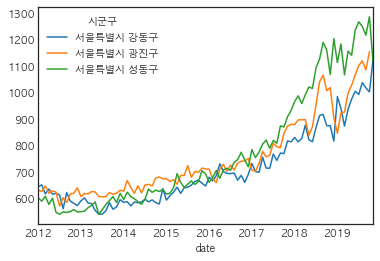

In [133]:
df_pivot.plot()

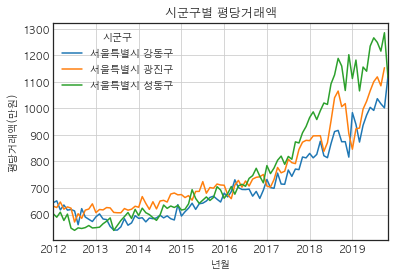

In [139]:
ax = df_pivot.plot(grid=True, marker="v", title="시군구별 평당거래액")
ax.set_ylabel("평당거래액(만원)")
ax.set_xlabel("년월")
plt.savefig("시군구별 평당거래액(서울).png", dpi=300)

In [140]:
df_pivot.describe()

시군구,서울특별시 강동구,서울특별시 광진구,서울특별시 성동구
count,95.000000,94.000000,95.000000
mean,708.788270,749.432731,771.661008
std,138.761942,146.839534,221.031656
min,541.572478,571.986471,540.342169
25%,594.716854,631.486362,600.831335
50%,664.619593,702.524570,679.673117
75%,813.691694,843.636955,919.979585
max,1121.735359,1153.215648,1285.038984


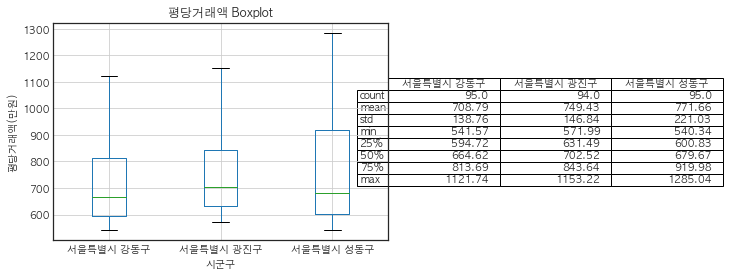

In [145]:
from pandas.plotting import table
import numpy as np

fig, ax = plt.subplots(1,1)
table(ax, np.round(df_pivot.reset_index().describe(), 2), loc="right")
ax.set_ylabel("평당거래액(만원)")
ax.set_xlabel("시군구")
df_pivot.plot.box(ax=ax, grid=True, title="평당거래액 Boxplot")
plt.savefig("boxplot.png", dpi=300)